In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('SATData - SATData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   GPA         1000 non-null   float64
 2   SAT         1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
df = df.drop(df.columns[[0]], axis = 1)

In [5]:
def testTrainSplit (df):
    df = df.sample(frac = 1, ignore_index=True)
    length = len(df.index)
    splitPoint = round(length * 0.70)
    training = df.iloc[:splitPoint, :]
    testing = df.iloc[splitPoint:, :]
    return training, testing

In [6]:
training, testing = testTrainSplit (df)

In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GPA     700 non-null    float64
 1   SAT     700 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 11.1 KB


In [8]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 700 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GPA     300 non-null    float64
 1   SAT     300 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


<AxesSubplot:xlabel='GPA', ylabel='SAT'>

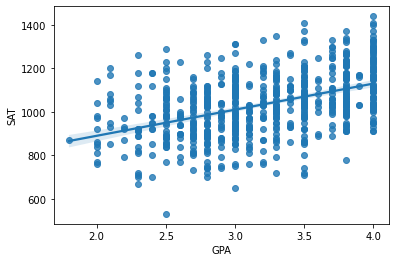

In [9]:
sns.regplot(x=training['GPA'], y=training['SAT'])

In [10]:
def lineOfBestFit (df, lSlope, hSlope, lYIntercept, hYIntercept):
    whichIsBest = []
    b = -1
    for slope in range (lSlope, hSlope):
        for yIntercept in range (lYIntercept, hYIntercept): 
            dSum = 0
            for index, row in df.iterrows():
                x1 = row['GPA'] 
                y1 = row['SAT']
                d = (abs((slope*x1) + (b*y1) + yIntercept))/(((slope**2) + (b**2))**0.5)
                dSum = dSum + d
            template = {"Distance Sum": dSum, "Slope": slope, "Y-Intercept": yIntercept}
            whichIsBest.append(template)
        
    dictionary = findSmallestSum (whichIsBest)
    
    return dictionary

In [11]:
def findSmallestSum (whichIsBest):
    lowest = float ('inf')
    for sum in whichIsBest:
        if sum['Distance Sum'] < lowest:
            lowest = sum['Distance Sum']
            dictionary = sum
    return dictionary

In [12]:
dictionary = lineOfBestFit (training, 0, 400 + 1, 0, 1400 + 1)

In [13]:
print(dictionary)

{'Distance Sum': 288.22940483444916, 'Slope': 325, 'Y-Intercept': 0}


In [15]:
dictionary = {'Distance Sum': 288.22940483444916, 'Slope': 325, 'Y-Intercept': 0}